In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.metrics import cohen_kappa_score

In [110]:
# Define the confusion matrix data as a numpy array
#array for StackedImage:

img0_4_08_20 = np.array([[20,0,0,0,1,0,0],[1,9,0,2,1,3,2],[0,4,3,4,1,1,3],[0,3,2,14,1,2,0],[0,2,3,1,9,3,1],[1,2,1,2,3,3,1],[0,0,1,4,2,4,9]])

img1_4_23_2020 = np.array([[19,0,1,0,1,0,0],[2,13,0,1,1,1,0],[2,3,5,2,4,0,0],[0,6,4,10,2,0,0],[3,1,3,0,9,1,2],[3,0,1,1,4,0,4],[0,0,1,0,6,0,13]])

img2_5_28_2020 = np.array([[19,0,1,1,0,0,0],[1,14,0,1,1,0,1],[1,2,5,1,6,1,0],[0,0,2,15,3,1,1],[2,0,3,2,11,1,0],[2,0,4,1,6,0,0],[0,0,2,1,0,1,16]])

img3_6_12_2020 = np.array([[20,1,0,0,0,0,0],[4,9,3,1,1,0,0],[0,3,3,2,5,2,1],[0,0,5,15,1,1,0],[2,0,4,1,10,2,0],[2,1,3,0,7,0,0],[0,0,3,0,1,0,16]])

img4_6_12_2020 = np.array([[17,2,2,0,0,0,0],[1,15,0,0,0,0,2],[1,3,4,2,4,2,0],[0,0,3,12,4,3,0],[1,1,5,1,10,1,0],[2,2,3,0,3,3,0],[0,0,2,0,1,0,17]])

img5_8_01_2020 = np.array([[19,0,0,0,2,0,0],[4,8,1,0,5,0,0],[0,2,2,1,4,4,3],[0,0,2,16,2,2,0],[1,0,4,1,8,1,4],[2,0,3,0,6,0,2],[0,0,1,0,0,0,19]])

img6_8_21_2020 = np.array([[16,0,1,0,2,0,2],[1,12,1,2,1,0,1],[1,1,1,2,6,3,2],[0,4,3,13,1,1,0],[3,0,1,2,12,0,1],[4,1,1,0,6,0,1],[0,0,1,1,2,0,16]])

img7_8_26_2020 = np.array([[16,0,0,1,3,1,0],[1,10,0,0,5,2,0],[2,4,1,2,3,1,3],[0,3,6,9,1,2,1],[4,0,4,0,7,2,2],[1,0,2,1,7,0,2],[0,0,0,0,3,0,17]])

img8_9_05_2020 = np.array([[17,1,1,0,2,0,0],[2,8,2,0,5,1,0],[1,4,2,3,3,1,2],[1,1,2,17,1,0,0],[4,1,4,0,8,1,1],[1,1,1,1,6,0,3],[0,0,0,1,4,0,15]])

img9_9_15_2020 = np.array([[17,2,0,1,1,0,0],[1,7,1,1,7,0,1],[0,1,2,2,4,4,3],[0,0,5,13,3,1,0],[5,0,2,0,11,0,1],[0,2,0,3,3,0,5],[0,0,2,1,2,0,15]])

img2345 = np.array([[20,0,0,0,1,0,0],[1,14,1,0,0,1,1],[0,3,3,3,4,2,1],[0,0,3,15,2,2,0],[2,0,3,0,13,1,0],[2,0,3,0,8,0,0],[0,0,1,0,1,0,18]])

img02154 =np.array([[20,0,0,0,1,0,0],[1,15,1,0,0,0,1],[1,0,6,1,5,2,1],[0,3,5,12,1,1,0],[1,0,2,0,14,1,1],[1,0,1,1,7,1,2],[0,0,0,0,0,0,20]])



#Choose which Stacked image you will use
data = img02154

In [111]:
# Labels for rows and columns
labels = ["PiAb", "PoBa", "FrEx", "AlIn", "QuRo", "AlGl", "SaAl"]

# Create DataFrame
cf_matrix = pd.DataFrame(data, index=labels, columns=labels)

print(cf_matrix)

      PiAb  PoBa  FrEx  AlIn  QuRo  AlGl  SaAl
PiAb    20     0     0     0     1     0     0
PoBa     1    15     1     0     0     0     1
FrEx     1     0     6     1     5     2     1
AlIn     0     3     5    12     1     1     0
QuRo     1     0     2     0    14     1     1
AlGl     1     0     1     1     7     1     2
SaAl     0     0     0     0     0     0    20


In [112]:
# Calculate metrics
accuracy_table = pd.DataFrame(index=labels, columns=['Producer\'s Accuracy', 'User\'s Accuracy', 'F1 Score'])

# Iterating over each label
for label in labels:
    TP = cf_matrix.loc[label, label]  # True Positives
    FN = cf_matrix.loc[label].sum() - TP  # False Negatives (sum of row without TP)
    FP = cf_matrix[label].sum() - TP  # False Positives (sum of column without TP)
    TN = cf_matrix.sum().sum() - TP - FN - FP  # True Negatives

    # Calculating F1 Score
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    producer_accuracy = recall
    user_accuracy = precision

    # Populate the table
    accuracy_table.loc[label] = [producer_accuracy, user_accuracy, f1_score]

# Print the result
print("\nAccuracy Table:\n", accuracy_table)


Accuracy Table:
      Producer's Accuracy User's Accuracy  F1 Score
PiAb            0.952381        0.833333  0.888889
PoBa            0.833333        0.833333  0.833333
FrEx               0.375             0.4  0.387097
AlIn            0.545455        0.857143  0.666667
QuRo            0.736842             0.5  0.595745
AlGl            0.076923             0.2  0.111111
SaAl                 1.0             0.8  0.888889


In [113]:
# Calculate Overall Accuracy
total_correct = np.trace(cf_matrix)  # Sum of the diagonal elements, which are correct predictions
total_predictions = cf_matrix.sum().sum()  # Sum of all elements in the matrix
overall_accuracy = total_correct / total_predictions

# Print Overall Accuracy
print(f"Overall Accuracy: {overall_accuracy:.4f}")

Overall Accuracy: 0.6822


In [99]:
# Labels for rows and columns
labels = ["PiAb", "PoBa", "FrEx", "AlIn", "QuRo", "AlGl", "SaAl"]

# Create DataFrame
cf_matrix = pd.DataFrame(data, index=labels, columns=labels)

print(cf_matrix)

      PiAb  PoBa  FrEx  AlIn  QuRo  AlGl  SaAl
PiAb    17     2     0     1     1     0     0
PoBa     1     7     1     1     7     0     1
FrEx     0     1     2     2     4     4     3
AlIn     0     0     5    13     3     1     0
QuRo     5     0     2     0    11     0     1
AlGl     0     2     0     3     3     0     5
SaAl     0     0     2     1     2     0    15


### Export the DataFrame to a CSV file

In [114]:
# Export the DataFrame to a CSV file
accuracy_table.to_csv("img02154.csv", index=True)

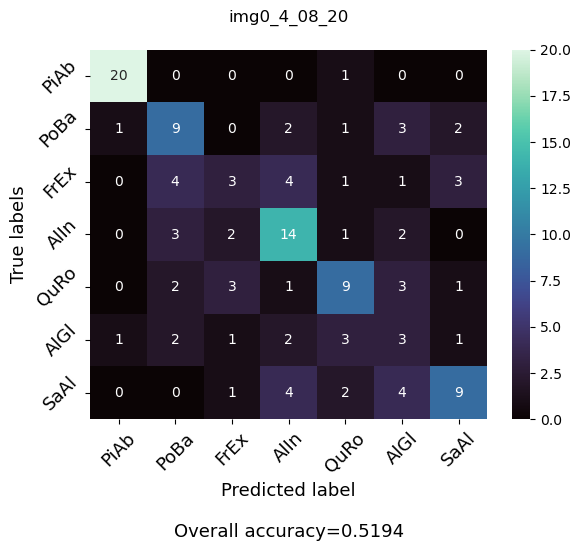

In [19]:
# You can change the colour to grey using this custom pallette
# Create a custom colormap
from matplotlib.colors import LinearSegmentedColormap
grey = LinearSegmentedColormap.from_list(
    name='grey_binary',
    colors=['#363636', 'white']  # dark grey to white
)
sns.heatmap(cf_matrix, annot=True, cmap= "mako")
# sns.heatmap(cf_matrix, annot=True, cmap="rocket")

# Get the current axis
ax = plt.gca()

# Define the rotation angle of axis labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=45,fontsize=13)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=13)

# Set axis names
ax.set_xlabel('Predicted labels', fontsize=13)
ax.set_ylabel('True labels', fontsize=13);

#Set the Title, accordingly to the stocked image used
# # Manually set the title based on the data used
# if data is stackedImage: title = 'StackedImage'
# elif data is stackedVegImage: title = 'StackedVegImage'
# elif data is stackedNormImage: title = 'stackedNormImage'
# elif data is pca: title = 'PCA 3 Bands'
# elif data is stackedNormImage_noMarch: title = 'stackedNormImage_noMarch'
# elif data is stackedNormImage_noMarch_hpt: title = 'stackedNormImage_noMarch_HyperParameterTuning'
# elif data is stackedNormImage_noMarch_hpt_noAcPs_AlGl: title = 'stackedNormImage_noMarch_HPT_no_AcPs_AlGl'
# else: title = 'Unknown Data'

ax.set_title(title, pad=20)

# Display accuracies
#plt.figtext(0.5, 0.05, f"Overall Accuracy: {overall_accuracy:.2f}", ha='center')
plt.xlabel('Predicted label\n\nOverall accuracy={:0.4f}'.format(overall_accuracy))
#plt.figtext(0.5, -0.01, f"Cohen's Kappa: {kappa:.2f}", ha='center')

# Show the plot
plt.show()